In [43]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from latexify import latexify, format_axes
from sklearn.tree import DecisionTreeRegressor


In [44]:
latexify(columns=2)

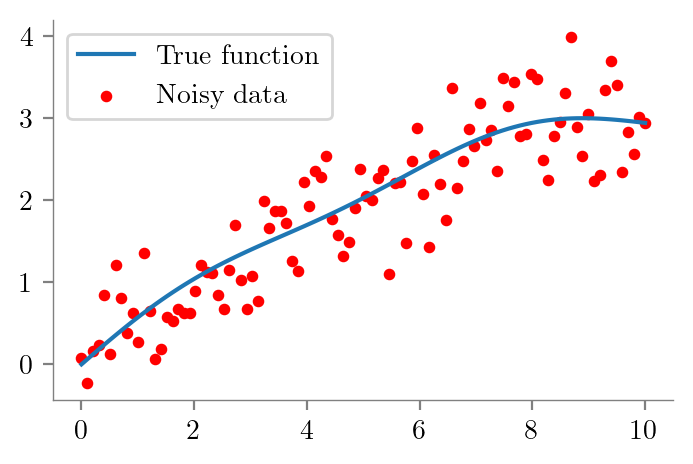

In [54]:
x_overall = np.linspace(0, 10, 100)
f_x = 0.1*np.sin(x_overall) + 0.5*x_overall - 0.01*x_overall**2 - 0.001*x_overall**3

eps = np.random.normal(0, 0.5, 100)
y_overall = f_x + eps
plt.plot(x_overall, f_x, label = 'True function')
plt.scatter(x_overall, y_overall, s=10, c='r', label = 'Noisy data')
format_axes(plt.gca())
plt.legend()

In [94]:
def fit_plot_tree(x, y, depth=1, extra=None):
    dt = DecisionTreeRegressor(max_depth=depth)
    dt.fit(x.reshape(-1, 1), y)
    y_pred = dt.predict(x.reshape(-1, 1))

    plt.plot(x_overall, f_x, label = r'$f_{true}$')
    #plt.scatter(x, y, s=10, c='r', label = 'Noisy data')
    label = r"$f_{\theta}$" if not extra else fr"$f^{{{extra}}}_{{\theta}}$"


    print(label)
    plt.plot(x, y_pred, label = label)

    format_axes(plt.gca())
    plt.legend()
    return dt

$f_{\theta}$


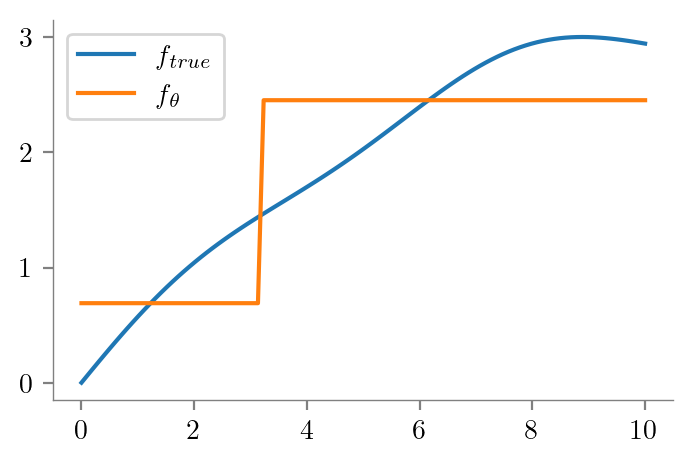

In [95]:
_ = fit_plot_tree(x_overall, y_overall, 1)

$f_{\theta}$
$f^{1}_{\theta}$
$f^{2}_{\theta}$
$f^{3}_{\theta}$
$f^{4}_{\theta}$
$f^{5}_{\theta}$
$f^{6}_{\theta}$
$f^{7}_{\theta}$
$f^{8}_{\theta}$
$f^{9}_{\theta}$


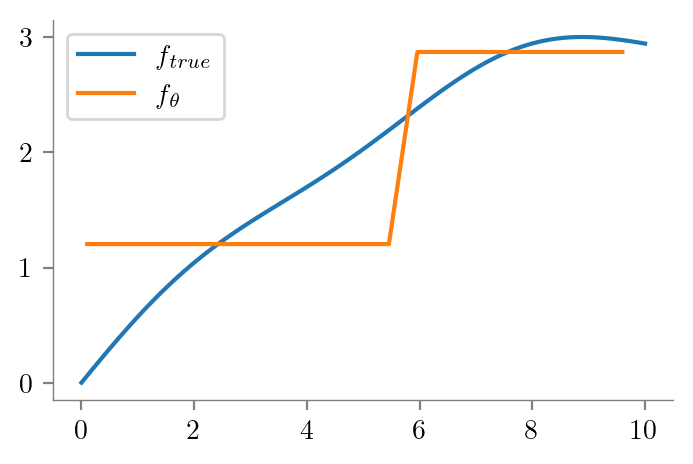

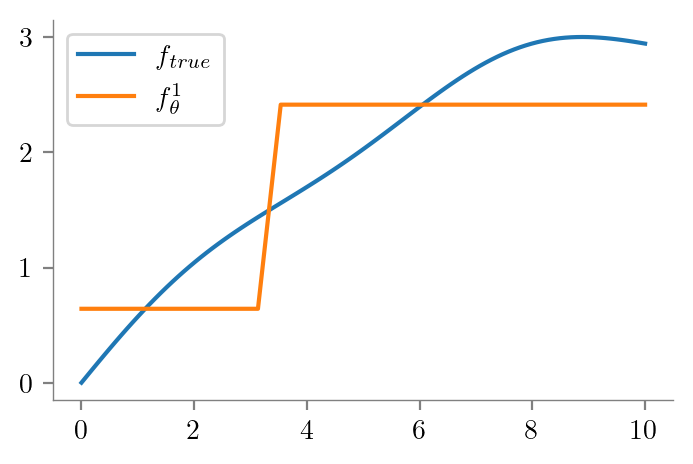

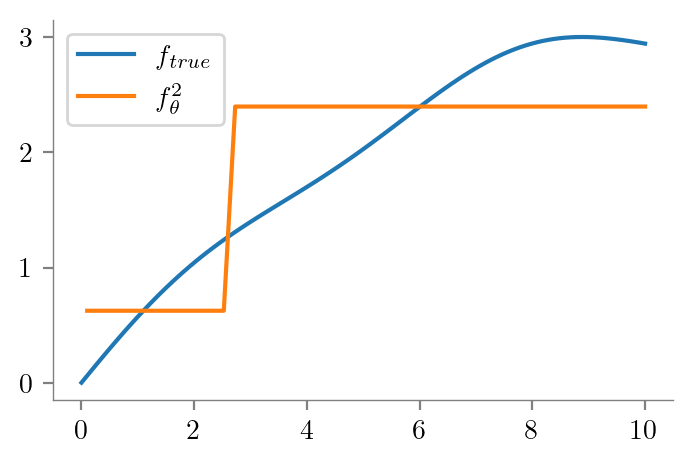

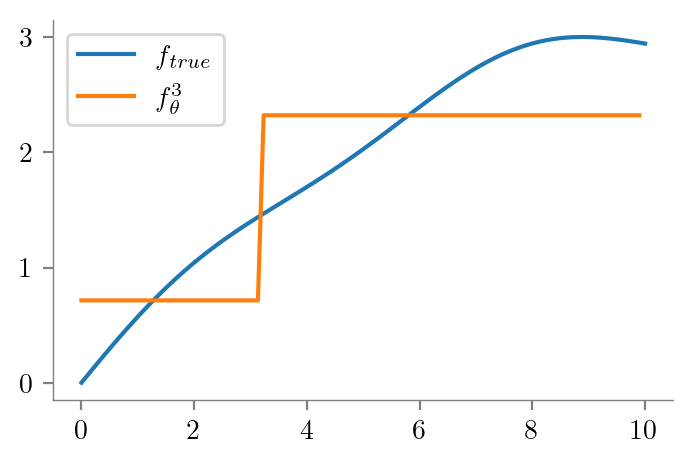

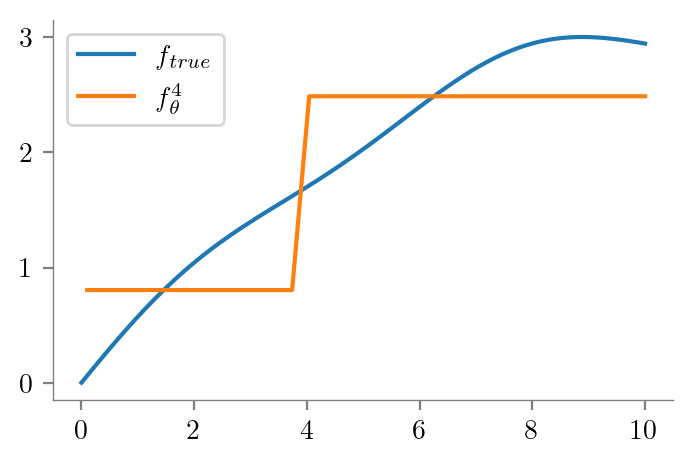

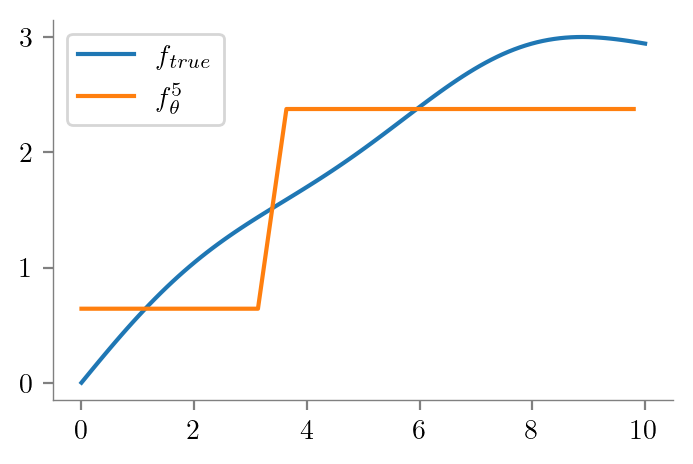

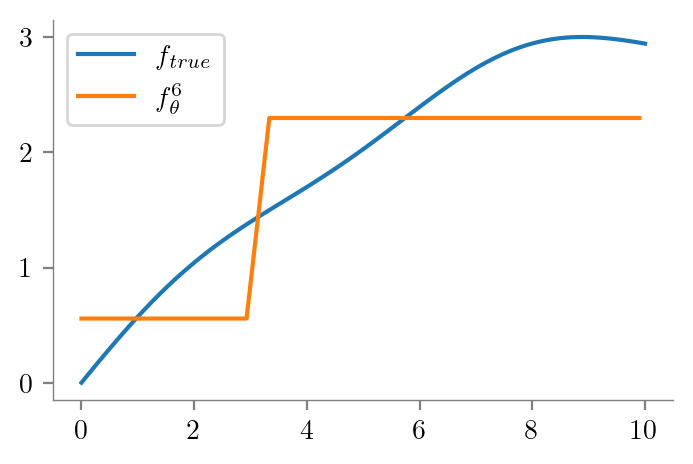

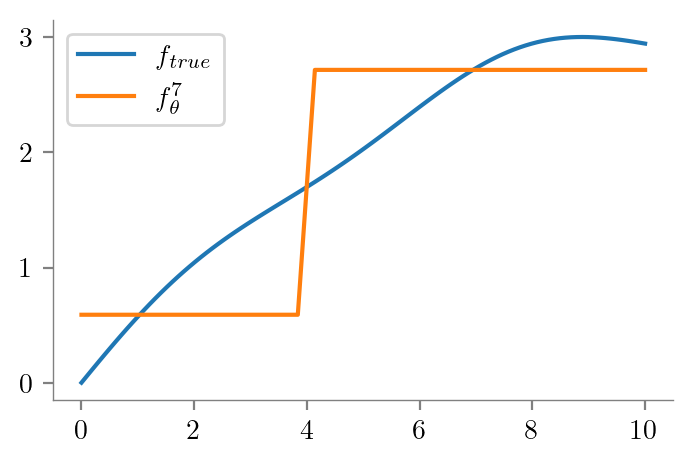

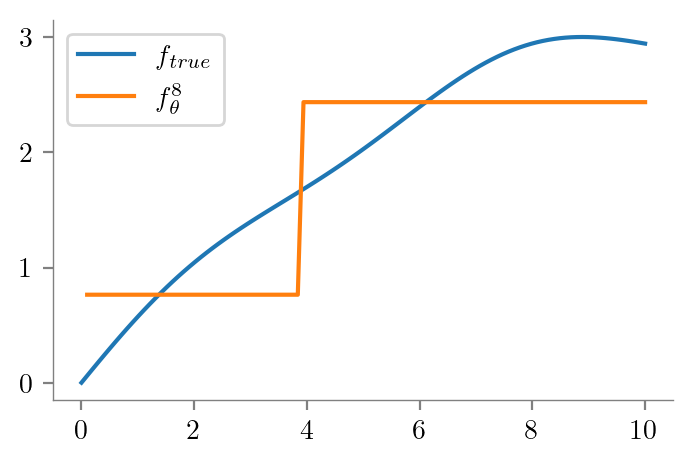

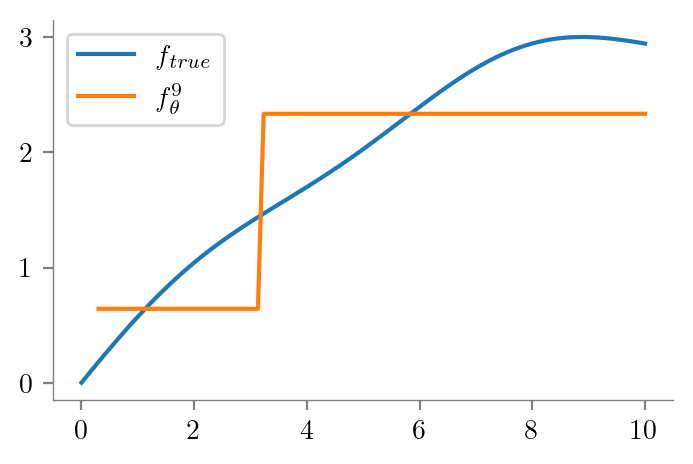

In [96]:
dts_1 = []
for i in range(10):
    idx = np.random.choice(100, 60)
    # sort index
    idx.sort()
    plt.figure()
    dts_1.append(fit_plot_tree(x_overall[idx].reshape(-1, 1), y_overall[idx], 1, i))


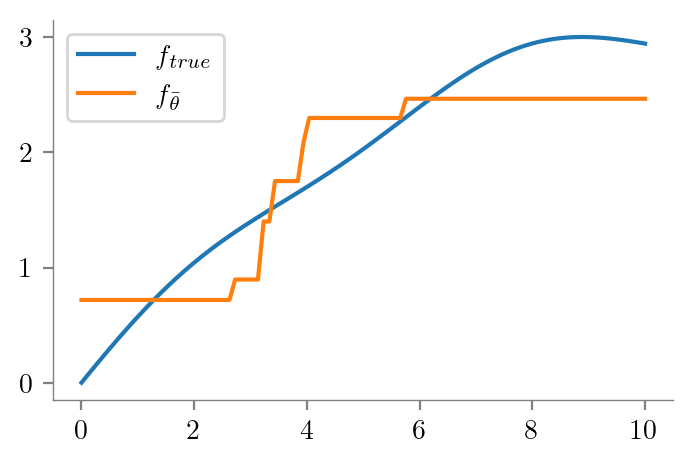

In [101]:
# Finding mean and variance of the predictions
x_test = np.linspace(0, 10, 100)

y_pred = np.zeros((10, 100))

for i in range(10):
    y_pred[i] = dts_1[i].predict(x_test.reshape(-1, 1))

y_pred_mean = np.mean(y_pred, axis=0)
y_pred_var = np.var(y_pred, axis=0)

plt.figure()
plt.plot(x_overall, f_x, label = r'$f_{true}$')
plt.plot(x_test, y_pred_mean, label = r'$f_{\bar{\theta}}$')
format_axes(plt.gca())
plt.legend()

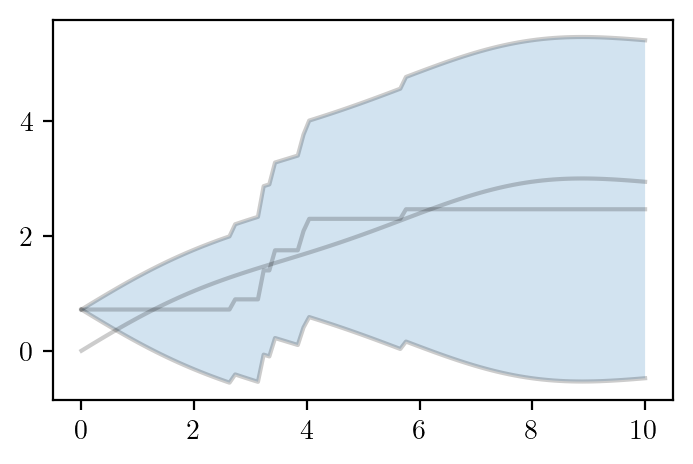

In [106]:
# Fill between mean and true function